In [75]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_excel('spread_sheet_for_DIB.xlsx', header=(0,1))
df.rename(columns=str.strip, inplace=True)

In [77]:
df

Unnamed: 0_level_0 SOCIO- DEMOGRAPHIC                                      \
     NO OF RESPONDENTS                SEX AGE RELIGION MARITAL STATUS YES JOB   
0                    1                  2   1        1              2       0   
1                    2                  1   2        1              1       1   
2                    3                  1   3        1              1       1   
3                    4                  2   1        1              1       1   
4                    5                  1   4        1              1       1   
..                 ...                ...  ..      ...            ...     ...   
491                492                  2   1        1              2       0   
492                493                  1   3        2              1       1   
493                494                  2   1        1              2       0   
494                495                  1   2        2              1       2   
495                496                  1   4        1              1       1   

                                                      ... WORK LIFE BALANCE  \
    YES NATURE ETHINITY NATURE OF FAMILY EDUCTAIONAL  ...              WLB4   
0            0        2                2           3  ...                 3   
1            2        1                1           3  ...                 4   
2            1        1                1           4  ...                 5   
3            2        1                1           5  ...                 2   
4            3        2                1           4  ...                 5   
..         ...      ...              ...         ...  ...               ...   
491          0        1                1           3  ...                 3   
492          2        2                1           3  ...                 4   
493          0        1                2           3  ...                 4   
494          0        1                2           3  ...                 4   
495          2        2                2           3  ...                 3   

                                                      
    WLB5 WLB6 WLB7 WLB8 WLB9 WLB10 WLB11 WLB12 WLB13  
0      4    4    4    2    4     3     3     3     1  
1      2    3    2    2    4     2     4     4     2  
2      4    3    2    5    2     3     5     4     3  
3      4    4    3    2    3     3     2     2     2  
4      4    4    2    3    4     2     4     5     2  
..   ...  ...  ...  ...  ...   ...   ...   ...   ...  
491    2    2    3    1    3     2     1     1     3  
492    4    3    2    3    5     3     4     3     5  
493    4    4    3    4    3     2     5     5     2  
494    3    4    3    4    3     3     3     4     2  
495    4    4    2    3    3     1     4     5     3  

[496 rows x 116 columns]

In [ ]:
data = pd.DataFrame()

data.insert(0, 'WORK LIFE BALANCE', df['EMPLOYMENT STATUS']['WORK LIFE BALANCE'])
data.insert(1, 'TIME TO READ', df['WORKING STYLE']['WS1'])
data.insert(2, 'TIME TO WATCH TV', df['WORKING STYLE']['WS2'])
data.insert(3, 'SPEND TIME WITH FAMILY', df['WORKING STYLE']['WS12'])
data.insert(4, 'SOCIAL ACTIVITIES', df['WORKING STYLE']['WS22'])
data.insert(5, 'RELAX FOR 2HRS', df['WORKING STYLE']['WS26'])
data.insert(6, 'TIME FOR SLEEP 8HRS', df['WORKING STYLE']['WS27'])
data.insert(7, 'FLEXIBLE WORKING HOURS', df['INSTITUTIONAL EFFORTS']['IE1']) #Binary
data.insert(8, 'STRESS AND FRUSTRATION', df['WORK LIFE BALANCE']['WLB12'])

In [79]:
df.shape

(496, 116)

In [80]:
data

,WORK LIFE BALANCE,TIME TO READ,TIME TO WATCH TV,SPEND TIME WITH FAMILY,SOCIAL ACTIVITIES,RELAX FOR 2HRS,TIME FOR SLEEP 8HRS,FLEXIBLE WORKING HOURS,STRESS AND FRUSTRATION
0,1,5,4,5,5,1,1,2,3
1,1,5,5,5,5,5,3,2,4
2,1,5,4,5,5,5,2,1,4
3,1,1,2,2,2,5,1,2,2
4,1,4,4,5,5,5,1,2,5
...,...,...,...,...,...,...,...,...,...
491,1,2,2,3,3,3,2,1,1
492,1,2,1,5,3,5,5,1,3
493,1,4,4,3,4,3,2,1,5
494,2,3,4,4,4,2,2,1,4


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [82]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.6060606060606061


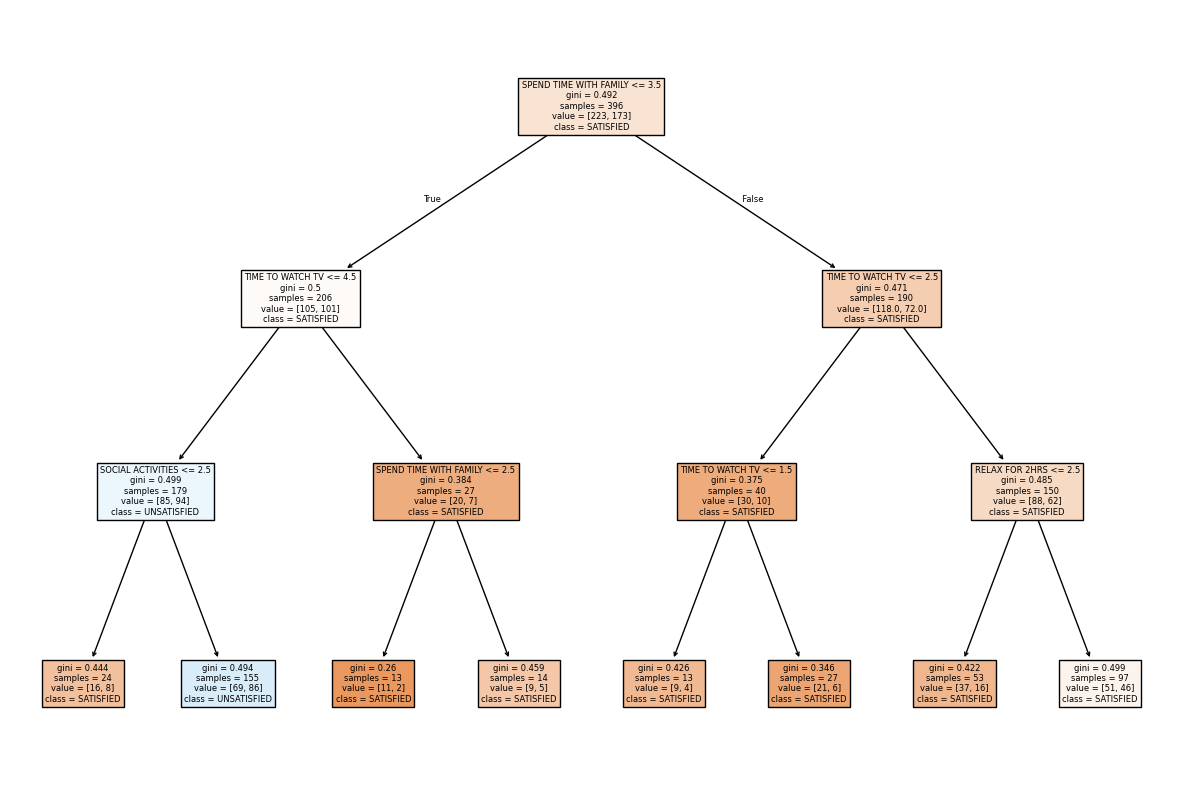

In [83]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['SATISFIED', 'UNSATISFIED'], filled=True)
plt.savefig('testfig.svg',format='svg')